In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/petrol_data.csv')
df

,city,date,rate,district
0,Chittoor,2016-07-01,70.75,Andhra Pradesh
1,Chittoor,2016-07-15,68.43,Andhra Pradesh
2,Chittoor,2016-08-01,67.06,Andhra Pradesh
3,Chittoor,2016-08-15,66.08,Andhra Pradesh
4,Chittoor,2016-09-01,69.56,Andhra Pradesh
...,...,...,...,...
35863,Yanam,2021-10-26,105.73,NaN
35864,Yanam,2021-10-27,106.07,NaN
35865,Yanam,2021-10-28,106.41,NaN
35866,Yanam,2021-10-29,106.75,NaN


In [ ]:
df.tail()

,city,date,rate,district
35863,Yanam,2021-10-26,105.73,NaN
35864,Yanam,2021-10-27,106.07,NaN
35865,Yanam,2021-10-28,106.41,NaN
35866,Yanam,2021-10-29,106.75,NaN
35867,Yanam,2021-10-30,107.09,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35868 entries, 0 to 35867
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      35868 non-null  object 
 1   date      35868 non-null  object 
 2   rate      35868 non-null  float64
 3   district  21684 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,rate
count,35868.000000
mean,88.869903
std,15.663138
min,48.600000
25%,75.700000
50%,85.220000
75%,104.242500
max,121.160000


In [ ]:
df.isnull().sum()

city            0
date            0
rate            0
district    14184
dtype: int64

In [ ]:
df.district.fillna('puducherry',inplace=True)
df


,city,date,rate,district
0,Chittoor,2016-07-01,70.75,Andhra Pradesh
1,Chittoor,2016-07-15,68.43,Andhra Pradesh
2,Chittoor,2016-08-01,67.06,Andhra Pradesh
3,Chittoor,2016-08-15,66.08,Andhra Pradesh
4,Chittoor,2016-09-01,69.56,Andhra Pradesh
...,...,...,...,...
35863,Yanam,2021-10-26,105.73,puducherry
35864,Yanam,2021-10-27,106.07,puducherry
35865,Yanam,2021-10-28,106.41,puducherry
35866,Yanam,2021-10-29,106.75,puducherry


In [ ]:
df.isnull().sum()

city        0
date        0
rate        0
district    0
dtype: int64

#1.Time Series Analysis:
Analyze the petrol rates over time to
identify trends, seasonality, and any long-term patterns. This
can help predict future petrol prices and plan for fluctuations in
fuel costs

In [ ]:
#Converting Date Column to Datetime
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

In [ ]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df

,city,rate,district,month
date,,,,
2011-11-16,Chandigarh,67.27,Chandigarh,11
2011-12-01,Chandigarh,66.47,Chandigarh,12
2012-04-01,Port Blair,58.06,Andaman and Nicobar Islands,4
2012-04-01,Chandigarh,66.48,Chandigarh,4
2012-05-24,Port Blair,65.56,Andaman and Nicobar Islands,5
...,...,...,...,...
2021-10-30,Sambalpur,110.48,puducherry,10
2021-10-30,Chandrapur,114.56,puducherry,10
2021-10-30,Sangareddy,113.64,puducherry,10


In [ ]:
df.head()

,city,rate,district,month
date,,,,
2011-11-16,Chandigarh,67.27,Chandigarh,11
2011-12-01,Chandigarh,66.47,Chandigarh,12
2012-04-01,Port Blair,58.06,Andaman and Nicobar Islands,4
2012-04-01,Chandigarh,66.48,Chandigarh,4
2012-05-24,Port Blair,65.56,Andaman and Nicobar Islands,5


 Time series data to visualize the trend and seasonality of petrol rates

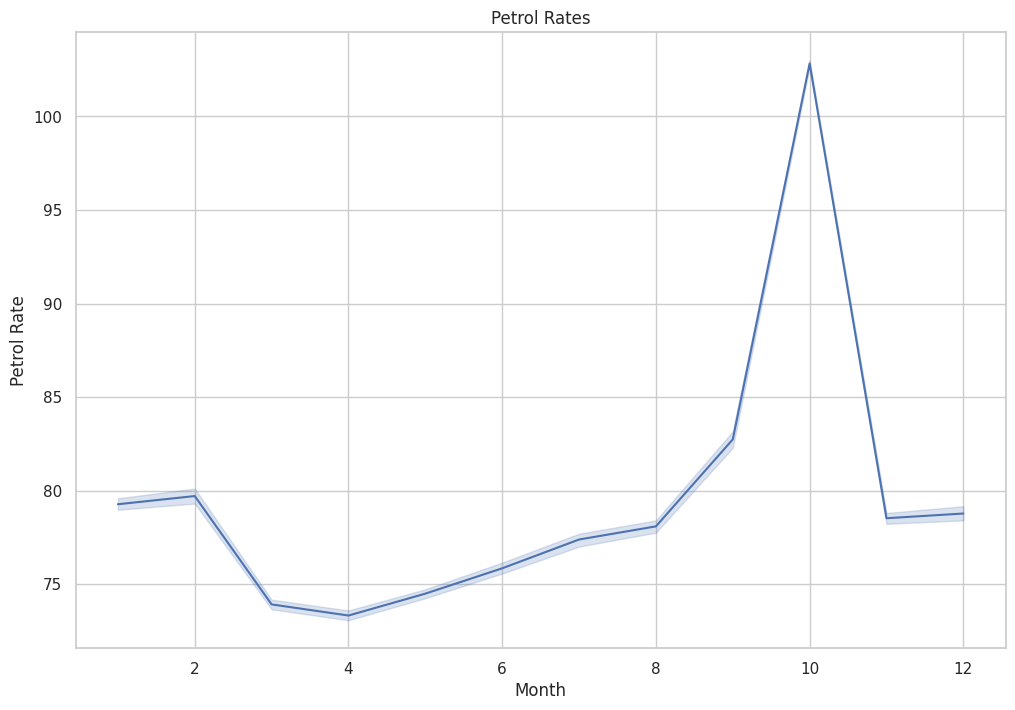

In [ ]:
#petrol rates in months.
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='month', y='rate')
plt.title('Petrol Rates')
plt.xlabel('Month')
plt.ylabel('Petrol Rate')
plt.grid(True)
plt.show()

In the above monthly representation of petrol rates highlights variations across months, aiding in the identification of recurring patterns or trends.

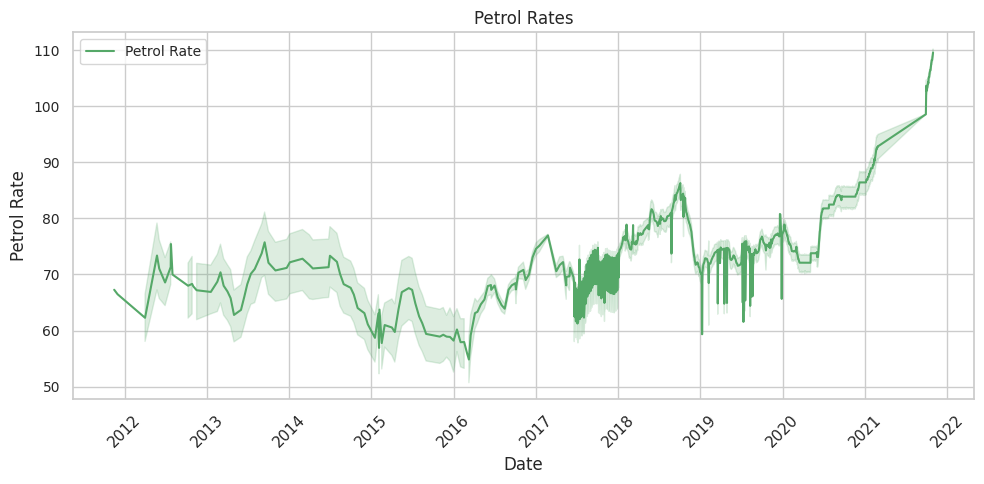

In [ ]:
#here plot the yearly petrol rate
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y='rate',label='Petrol Rate', color='g')
plt.title('Petrol Rates')
plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In the above yearly plot of district-wise petrol rates over time reveals annual fluctuations and overall price trends."

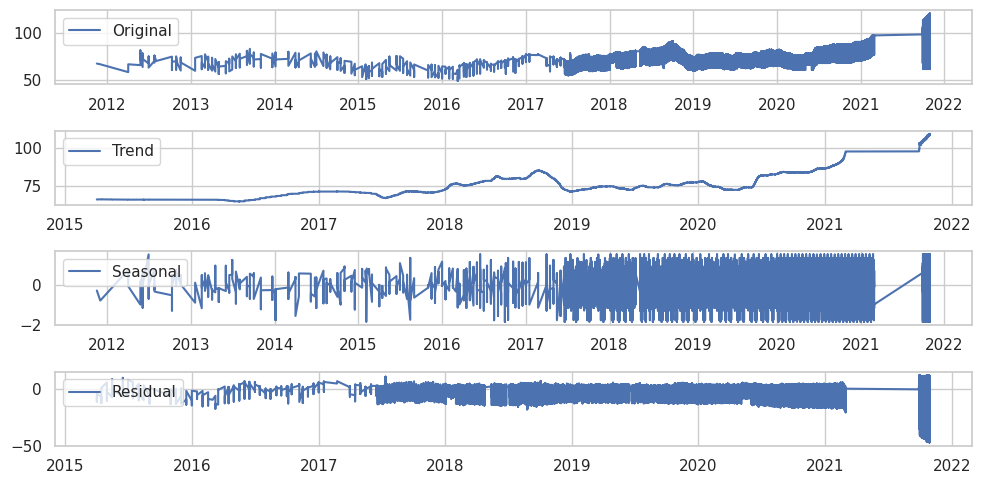

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Here decompose the time series.
decomposition = seasonal_decompose(df['rate'], model='additive', period=365)

#plot the decomposed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 5))
plt.subplot(411)
plt.plot(df['rate'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In the above Seasonal decomposition of the original district-wise petrol rate time series highlights its trend, seasonal patterns, and residual fluctuations.

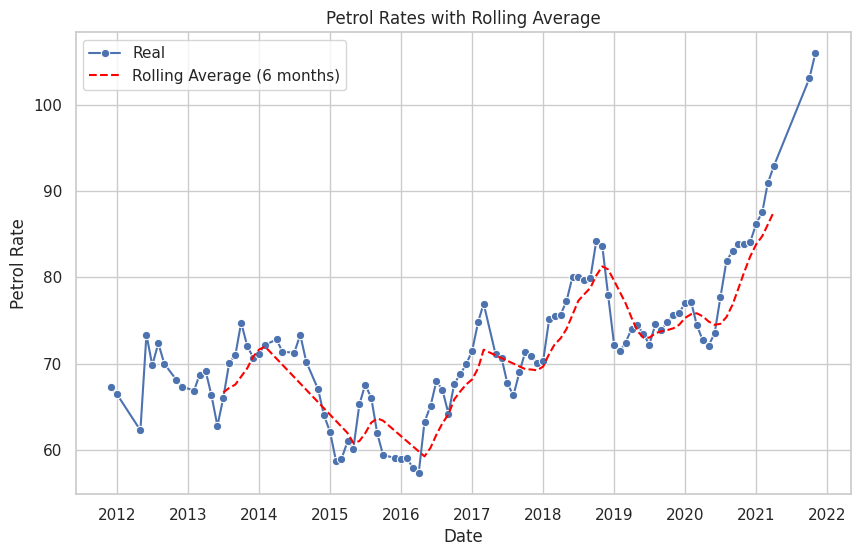

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#here i used resample data to monthly frequency
df_monthly = df['rate'].resample('M').mean()#rolling average is for Smoothing
rolling_avg = df_monthly.rolling(window=6).mean()#window is set as 6months
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly, marker='o', linestyle='-', label='Real')
sns.lineplot(data=rolling_avg, color='red', linestyle='--', label='Rolling Average (6 months)')
plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.title('Petrol Rates with Rolling Average')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In the above Monthly rolling average of district-wise petrol rates, displayed alongside real values, reveals smoothed trends and helps in spotting longer-term patterns.

<Figure size 1200x600 with 0 Axes>

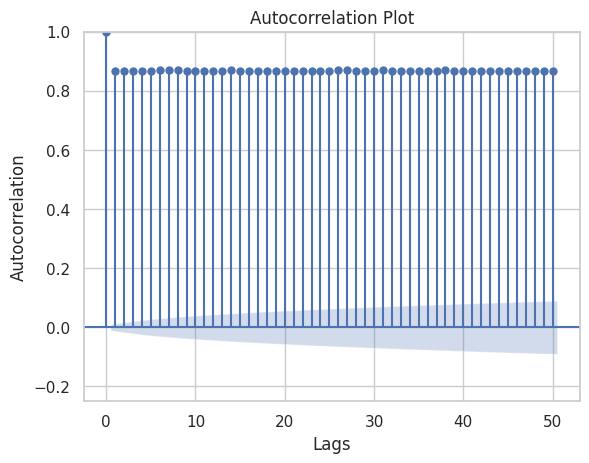

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

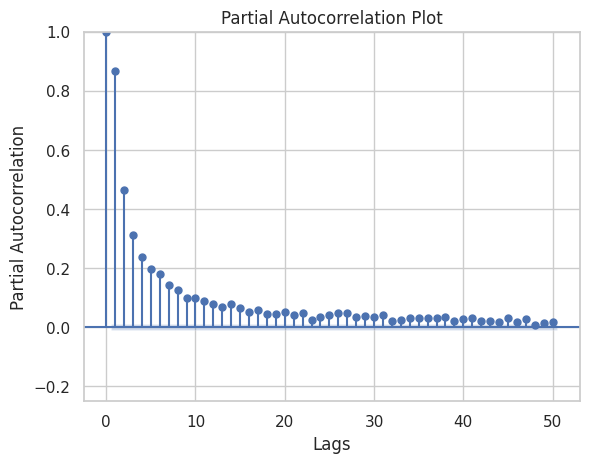

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['rate'], lags=50, alpha=0.05)#ACF determine in order to Moving Average (MA)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.ylim(bottom=-0.25)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['rate'], lags=50, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.ylim(bottom=-0.25)
plt.grid(True)
plt.show()


In the above The ACF and PACF plots help identify potential lag orders for ARIMA modeling of district-wise petrol price time series data.

#2. Geographic Analysis:
Compare petrol rates across different cities or districts to understand regional variations. Identify cities with consistently higher or lower rates and explore the reasons behind these differences

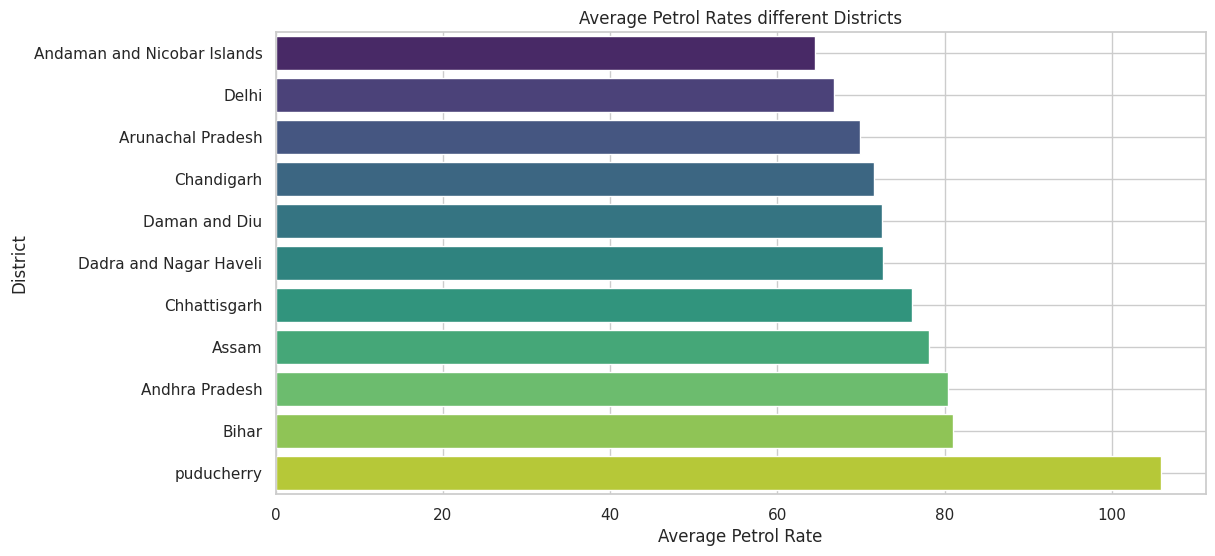

In [ ]:
#Compare petrol rates across different districts
dist_avg = df.groupby('district')['rate'].mean().reset_index()#different district mean price.
dist_avg.sort_values(by='rate', ascending=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='rate', y='district', data=dist_avg,alpha=1.0,palette='viridis')#plotting petrol rates across different districts.
plt.xlabel('Average Petrol Rate')
plt.ylabel('District')
plt.title('Average Petrol Rates different Districts')
plt.grid(True)
plt.show()


Above Puducherry has one of the highest average petrol rates among all the districts and lowest is Andaman and nicobar islands.


Top 10 cities with highest mean petrol rates:
                      mean   median       std  count
district                                            
puducherry      105.924048  105.880  7.585125  14184
Bihar            80.973538   80.540  5.450630    880
Andhra Pradesh   80.412017   78.650  6.031764  12428
Assam            78.184304   77.405  6.287383   2632
Chhattisgarh     76.100935   75.215  5.294356    880


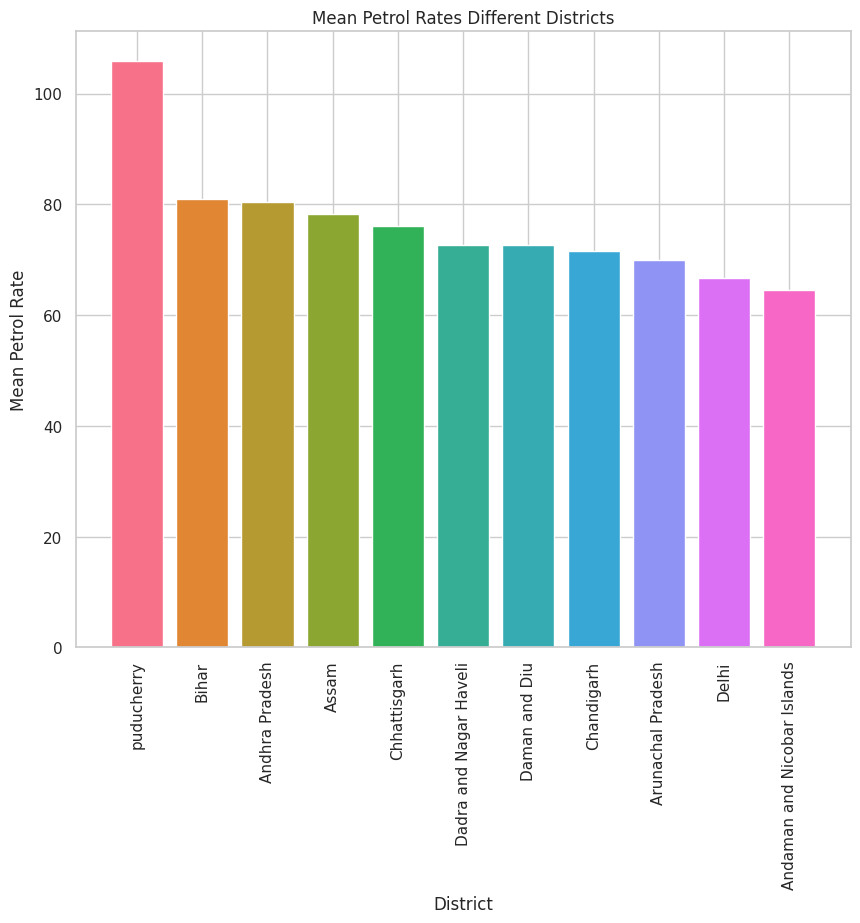

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt# district mean and median petrol rates for each district

district = df.groupby('district')['rate'].agg(['mean', 'median', 'std', 'count'])

district = district.sort_values(by='mean', ascending=False)
print('Top 10 cities with highest mean petrol rates:')
print(district.head(5))

# Create a custom color palette
colors = sns.color_palette('husl', len(district))

plt.figure(figsize=(10, 8))
plt.bar(district.index, district['mean'], color=colors)
plt.xlabel('District')
plt.ylabel('Mean Petrol Rate')
plt.title('Mean Petrol Rates Different Districts')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In above plot shows Puducherry stands out as the district with the highest mean petrol rates among the top 10, with an average rate of approximately 105.92.

#3. Rate Change Detection:
Detect significant rate changes or
outliers in the dataset and investigate the events or factors that
might have caused these fluctuations.

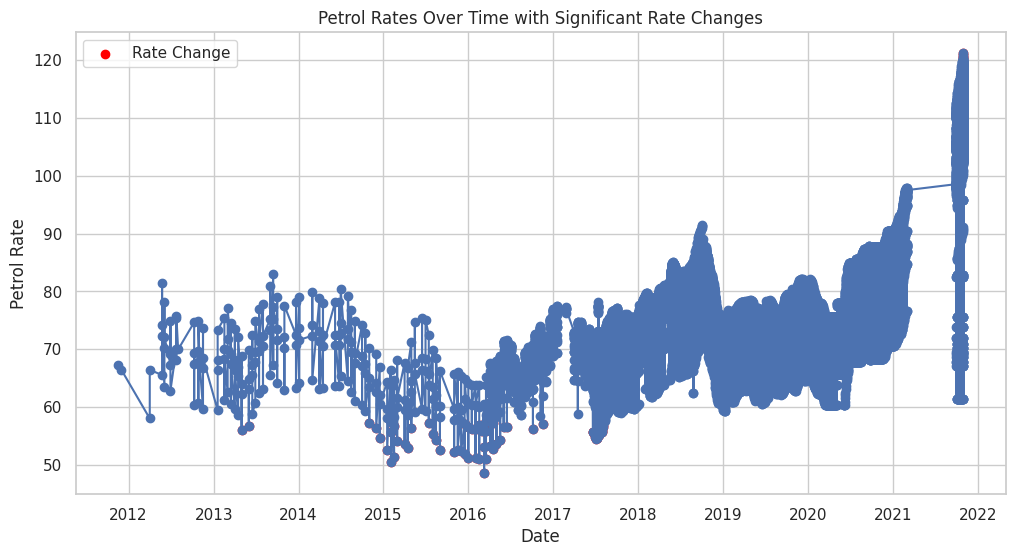

Data with Significant Rate Changes:
                   city    rate                     district  month
date                                                               
2013-05-01   Port Blair   55.99  Andaman and Nicobar Islands      5
2013-06-01   Port Blair   56.78  Andaman and Nicobar Islands      6
2014-11-01   Port Blair   57.27  Andaman and Nicobar Islands     11
2014-12-01   Port Blair   56.48  Andaman and Nicobar Islands     12
2014-12-16   Port Blair   54.73  Andaman and Nicobar Islands     12
...                 ...     ...                          ...    ...
2017-08-04   Port Blair   56.95  Andaman and Nicobar Islands      8
2021-10-28   Ganganagar  120.42                   puducherry     10
2021-10-29   Ganganagar  120.79                   puducherry     10
2021-10-30  Hanumangarh  120.44                   puducherry     10
2021-10-30   Ganganagar  121.16                   puducherry     10

[69 rows x 4 columns]


In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

def detect_rate(data, threshold=2): #using z-score method for detect rate changes outliers
    z_score = np.abs(stats.zscore(data))
    return z_score > threshold

significant_rate= detect_rate(df['rate'])
plt.figure(figsize=(12, 6))
plt.plot(df['rate'], marker='o', linestyle='-')
plt.scatter(df.index[significant_rate], df['rate'][significant_rate], color='red', label='Rate Change')
plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.title('Petrol Rates Over Time with Significant Rate Changes')
plt.legend()
plt.grid(True)
plt.show()

significant_changes_data = df[significant_rate]
print("Data with Significant Rate Changes:")
print(significant_changes_data)


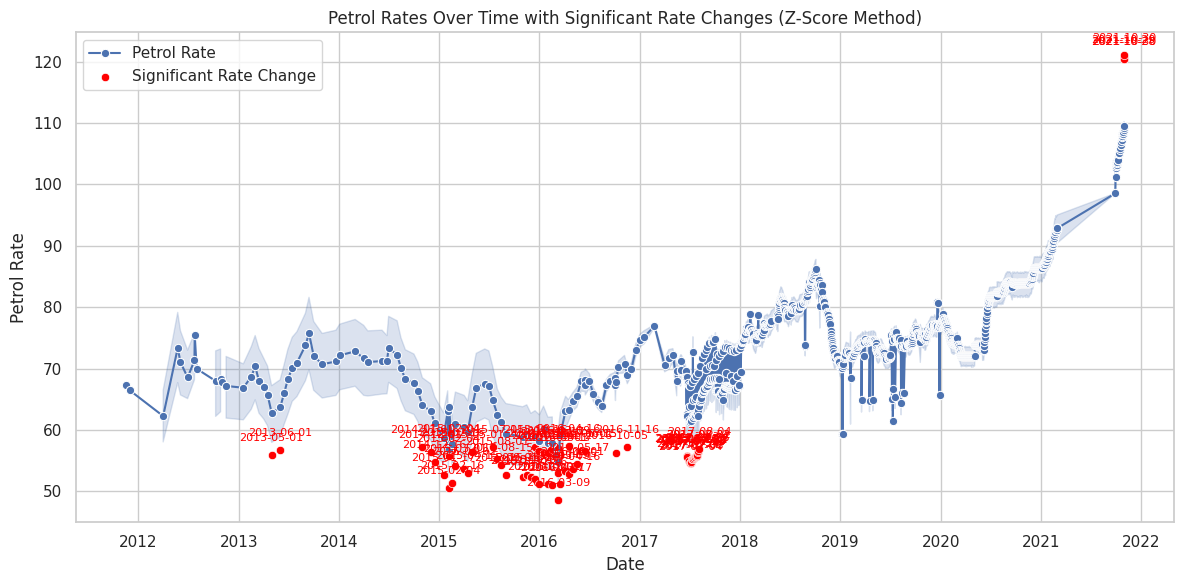

Data with Significant Rate Changes:
                   city    rate                     district  month
date                                                               
2013-05-01   Port Blair   55.99  Andaman and Nicobar Islands      5
2013-06-01   Port Blair   56.78  Andaman and Nicobar Islands      6
2014-11-01   Port Blair   57.27  Andaman and Nicobar Islands     11
2014-12-01   Port Blair   56.48  Andaman and Nicobar Islands     12
2014-12-16   Port Blair   54.73  Andaman and Nicobar Islands     12
...                 ...     ...                          ...    ...
2017-08-04   Port Blair   56.95  Andaman and Nicobar Islands      8
2021-10-28   Ganganagar  120.42                   puducherry     10
2021-10-29   Ganganagar  120.79                   puducherry     10
2021-10-30  Hanumangarh  120.44                   puducherry     10
2021-10-30   Ganganagar  121.16                   puducherry     10

[69 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Calculate z-scores for rate changes
z_scores = np.abs(stats.zscore(df['rate']))

# Set a threshold for z-scores to identify outliers
threshold = 2

# Detect significant rate changes (outliers) using z-scores
significant_rate_changes = z_scores > threshold

# Create a Seaborn line plot for petrol rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='rate', marker='o', label='Petrol Rate')

# Highlight significant rate changes with red markers
sns.scatterplot(data=df[significant_rate_changes], x=df.index[significant_rate_changes], y='rate', color='red', label='Significant Rate Change')

# Annotate the plot with significant rate change dates
for idx, date in enumerate(df.index[significant_rate_changes]):
    plt.annotate(str(date.date()), (date, df['rate'][significant_rate_changes][idx]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.title('Petrol Rates Over Time with Significant Rate Changes (Z-Score Method)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Get data with significant rate changes (outliers)
significant_changes_data = df[significant_rate_changes]
print("Data with Significant Rate Changes:")
print(significant_changes_data)


In above plot rate changes in various cities and districts, particularly in the context of Andaman and Nicobar Islands and Puducherry.

In [ ]:

sorted_significant = significant_changes_data.sort_values(by=['city', 'rate'], ascending=False)
sorted_significant

,city,rate,district,month
date,,,,
2015-07-15,Port Blair,57.31,Andaman and Nicobar Islands,7
2014-11-01,Port Blair,57.27,Andaman and Nicobar Islands,11
2016-11-16,Port Blair,57.18,Andaman and Nicobar Islands,11
2017-08-04,Port Blair,56.95,Andaman and Nicobar Islands,8
2013-06-01,Port Blair,56.78,Andaman and Nicobar Islands,6
...,...,...,...,...
2021-10-30,Ganganagar,121.16,puducherry,10
2021-10-29,Ganganagar,120.79,puducherry,10
2021-10-28,Ganganagar,120.42,puducherry,10


#4. Monthly and Seasonal Analysis:
Identify monthly and seasonal
patterns in petrol rates. For example, petrol prices may
increase during peak travel seasons or due to certain economic
events.

In [ ]:
df_monthly

date
2011-11-30     67.270000
2011-12-31     66.470000
2012-01-31           NaN
2012-02-29           NaN
2012-03-31           NaN
                 ...    
2021-06-30           NaN
2021-07-31           NaN
2021-08-31           NaN
2021-09-30    103.059763
2021-10-31    105.976066
Freq: M, Name: rate, Length: 120, dtype: float64

In [ ]:
df_monthly.isna().sum()

15

In [ ]:
df_monthly.dropna(inplace=True)


In [ ]:
df_monthly.isna().sum()

0

In [ ]:
df_monthly.fillna(method='ffill', inplace=True)
df_monthly

date
2011-11-30     67.270000
2011-12-31     66.470000
2012-04-30     62.270000
2012-05-31     73.372500
2012-06-30     69.800000
                 ...    
2021-01-31     87.574449
2021-02-28     90.921310
2021-03-31     92.880417
2021-09-30    103.059763
2021-10-31    105.976066
Name: rate, Length: 105, dtype: float64

<Figure size 1200x800 with 0 Axes>

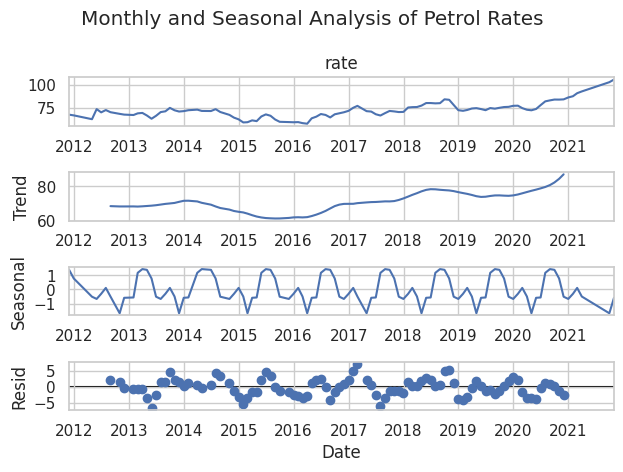

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df_monthly = df_monthly.fillna(method='ffill')#here i used forword fill.

#from seasonal decomposition.
decomposition = seasonal_decompose(df_monthly, model='additive',period=12)#as 12 months

plt.figure(figsize=(12, 8))#plot
decomposition.plot()
plt.xlabel('Date')
plt.suptitle('Monthly and Seasonal Analysis of Petrol Rates')
plt.tight_layout()
plt.show()


The above The "Seasonal" component displays the recurring patterns as period of 12 months  predictable fluctuations in petrol rates that occur around the same time every year.

#5. Correlation Analysis:
Investigate correlations between petrol rates and other factors like economic indicators, global oil prices, or local events that might influence petrol prices.

<ipython-input-97-811407a803dd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


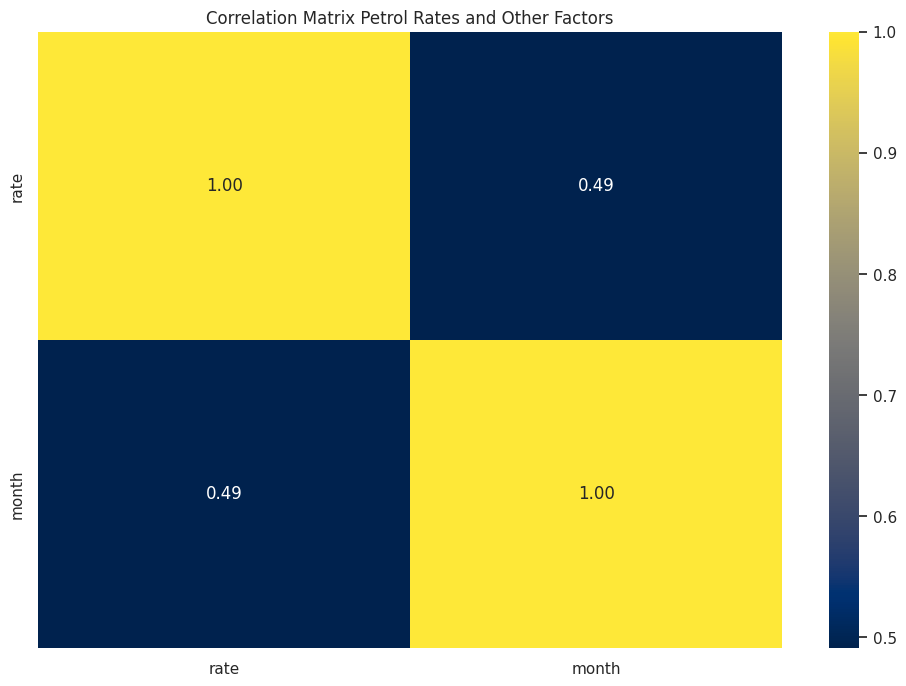

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df.corr()

plt.figure(figsize=(12, 8))#correlation matrix using a heatmap.
sns.heatmap(correlation, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation Matrix Petrol Rates and Other Factors')
plt.show()


In the above plot the heatmap indicate a positive correlation between the variables.

#6. Forecasting:
 Use time series forecasting models to predict
future petrol rates, taking into account historical trends and
influencing factors.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Clean the data: interpolate missing values and remove invalid entries
df['rate'].interpolate(inplace=True)
df.dropna(subset=['rate'], inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()
# Select the 'Close' column for analysis
ts = df['rate']

# Perform seasonal differencing
seasonal_period = 12
ts_seasonal_diff = ts.diff(seasonal_period).dropna()


# Test for stationarity using ADF test
def test_stationarity(ts):
    result = adfuller(ts_seasonal_diff)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary. Differencing is needed.")

# Check stationarity of the original time series
print("Stationarity Test for Original Data:")
test_stationarity(df_monthly['rate'])
test_stationarity

<ipython-input-98-ce13874efd76>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()


Stationarity Test for Original Data:
ADF Statistic: -39.49878052921564
p-value: 0.0
Critical Values: {'1%': -3.4305326598024006, '5%': -2.861620731175865, '10%': -2.5668129706576854}
The data is stationary.


<function __main__.test_stationarity(ts)>

In [ ]:
df['rate First Difference'] = df['rate'] - df['rate'].shift(1)
df['rate First Difference']

date
2011-11-16      NaN
2011-12-01    -0.80
2012-04-01    -8.41
2012-04-01     8.42
2012-05-24    -0.92
              ...  
2021-10-30    41.73
2021-10-30     4.08
2021-10-30    -0.92
2021-10-30    -0.83
2021-10-30    -5.72
Name: rate First Difference, Length: 35868, dtype: float64

In [ ]:
test_stationarity(df['rate First Difference'])

ADF Statistic: -39.49878052921564
p-value: 0.0
Critical Values: {'1%': -3.4305326598024006, '5%': -2.861620731175865, '10%': -2.5668129706576854}
The data is stationary.


<ipython-input-117-3977510b6e77>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()


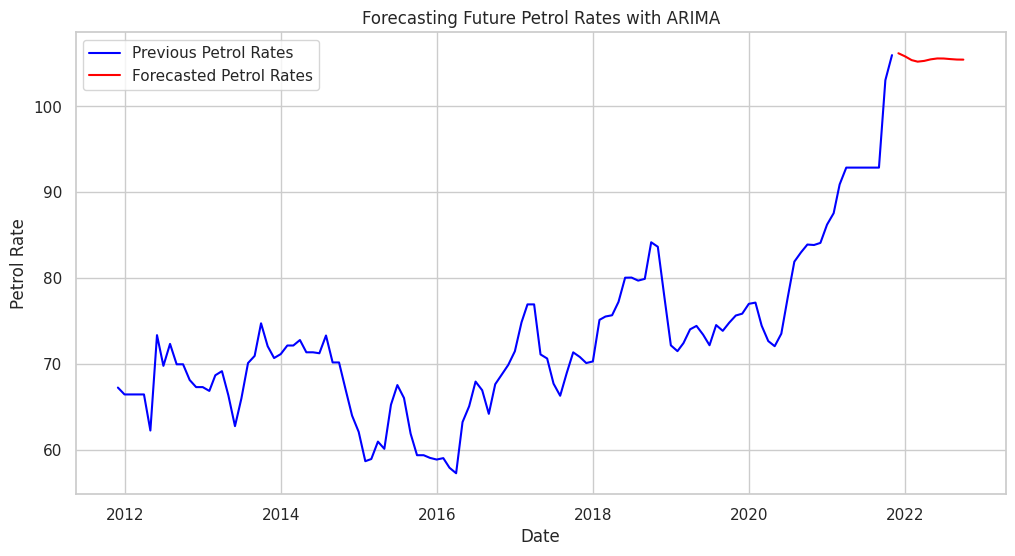

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df_monthly = df.resample('M').mean()

order = (2,1,2)  # as (p, d, q) method.
arima_model = ARIMA(df_monthly['rate'], order=order)
arima_fit = arima_model.fit()

# Forecast future.
forecast_steps = 12
forecast = arima_fit.forecast(steps=forecast_steps)

forecast_start = pd.to_datetime('2021-10-01')  # forecasted start date.
forecast_date = pd.date_range(start=forecast_start, periods=forecast_steps, freq='M')

forecast_df = pd.DataFrame({'forecast': forecast}, index=forecast_date)

#fill any missing values using forward fill method
forecast_df.fillna(method='ffill', inplace=True)
df_monthly['rate'].fillna(method='ffill',inplace=True)

plt.figure(figsize=(12, 6))  # forecasted petrol rates & previous data
plt.plot(df_monthly.index, df_monthly['rate'], label='Previous Petrol Rates', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecasted Petrol Rates', color='red')
plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.title('Forecasting Future Petrol Rates with ARIMA')
plt.legend()
plt.grid(True)
plt.show()

In the above plot The ARIMA model forecasts future petrol rates based on historical data, showing the expected trend and providing insight into potential rate changes.

#7. Impact of District:
 Explore how the district or administrative
division affects petrol rates. Identify districts with the highest
and lowest rates and understand the factors contributing to
these differences.

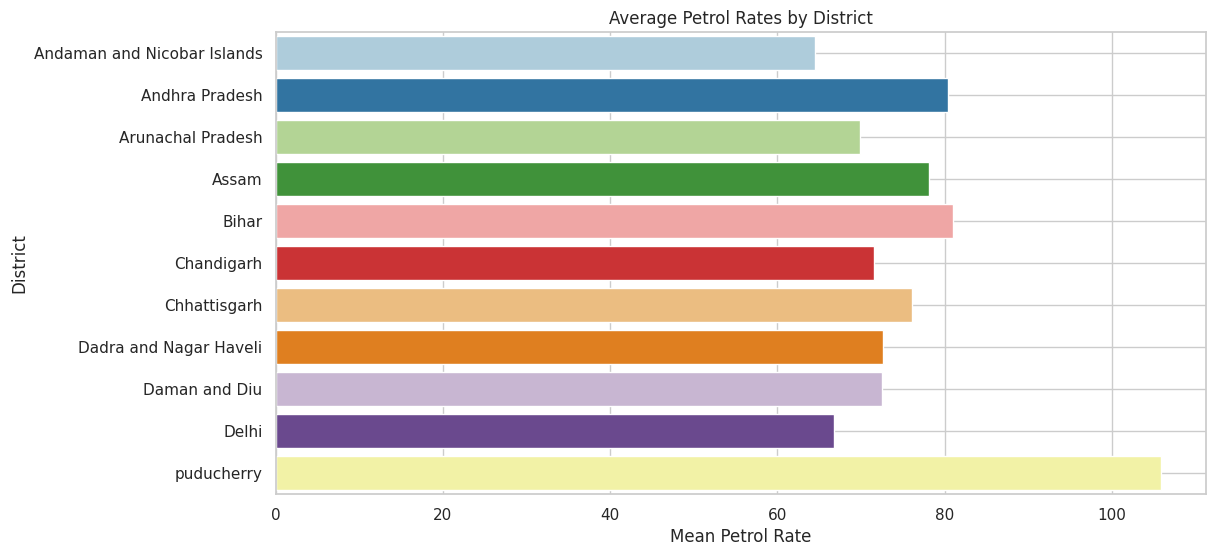

In [ ]:
#districts with the Highest and Lowest Rates
district = df.groupby('district')['rate'].mean()

highest_rates = district.nlargest(5)
lowest_rates = district.nsmallest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=district, y=district.index,palette='Paired')
plt.xlabel('Mean Petrol Rate')
plt.ylabel('District')
plt.title('Average Petrol Rates by District')
plt.grid(True)
plt.show()

In the above plot The bar plot illustrates average petrol rates by district, highlighting the districts with both the highest and lowest mean rates of fuel pricing.

#boxplot compare petrol rates of different districts

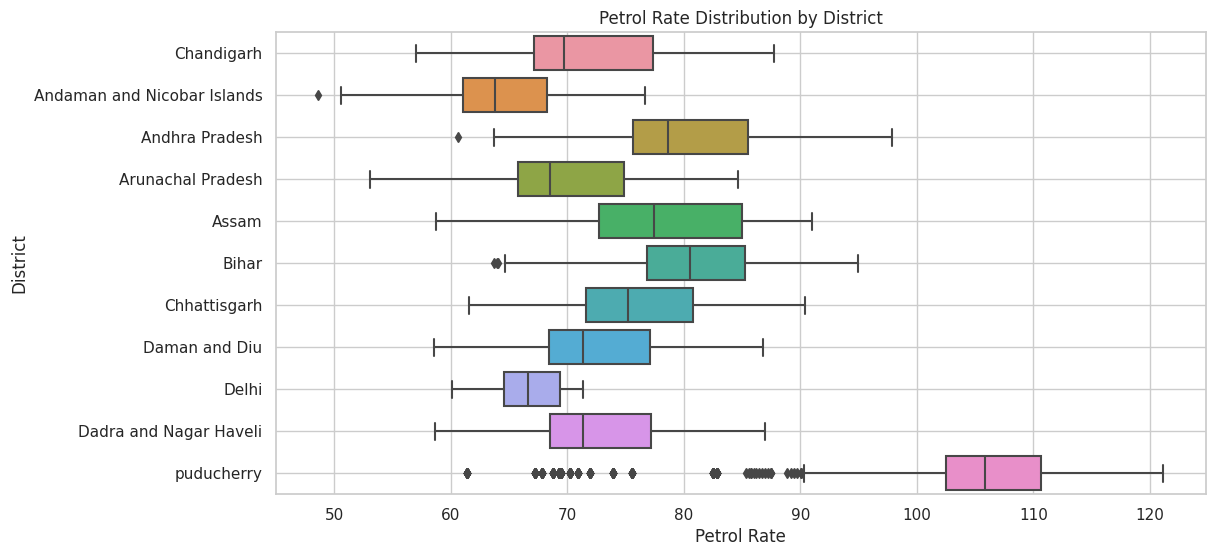

In [ ]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='rate', y='district', data=df)
plt.xlabel('Petrol Rate')
plt.ylabel('District')
plt.title('Petrol Rate Distribution by District')
plt.grid(True)
plt.show()


In the above boxpolt visually depicts the distribution of petrol rates across districts, revealing central tendencies, variations, and potential outliers in the dataset.

#8. Price Comparison:
Compare petrol rates across different cities
to identify the most and least expensive places to buy petrol.

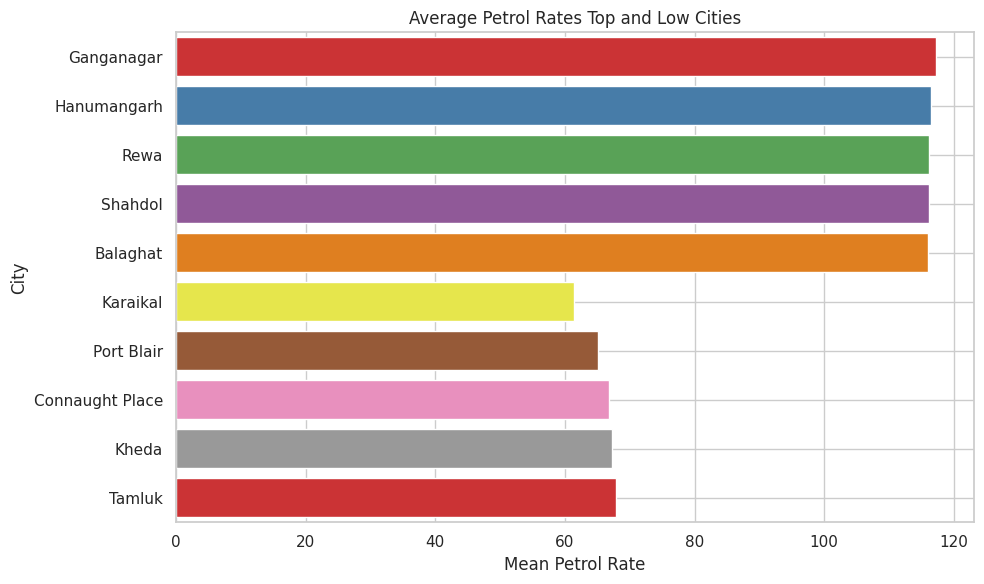

The most city to buy petrol is: Ganganagar
The least city to buy petrol is: Karaikal


In [ ]:
# Most and least expensive places to buy petrol.
city_mean_rate = df.groupby('city')['rate'].mean()

top_cities = city_mean_rate.nlargest(5)
low_cities = city_mean_rate.nsmallest(5)

selected_cities = pd.concat([top_cities, low_cities])  # Top and low cities



plt.figure(figsize=(10, 6))
sns.barplot(x=selected_cities.values, y=selected_cities.index, palette='Set1')
plt.xlabel('Mean Petrol Rate')
plt.ylabel('City')
plt.title('Average Petrol Rates Top and Low Cities')
plt.grid(True)
plt.tight_layout()
plt.show()

most_expensive_cities = city_mean_rate.nlargest(1)
least_expensive_cities = city_mean_rate.nsmallest(1)
print(f"The most city to buy petrol is: {most_expensive_cities.index[0]}")
print(f"The least city to buy petrol is: {least_expensive_cities.index[0]}")

In the above barplot highlights the most and least expensive cities to buy petrol specific cities with the highest and lowest average petrol rates.

#9. Price Index Calculation:
 Calculate petrol price indices for
different cities or districts to measure the relative changes in
petrol rates over time.

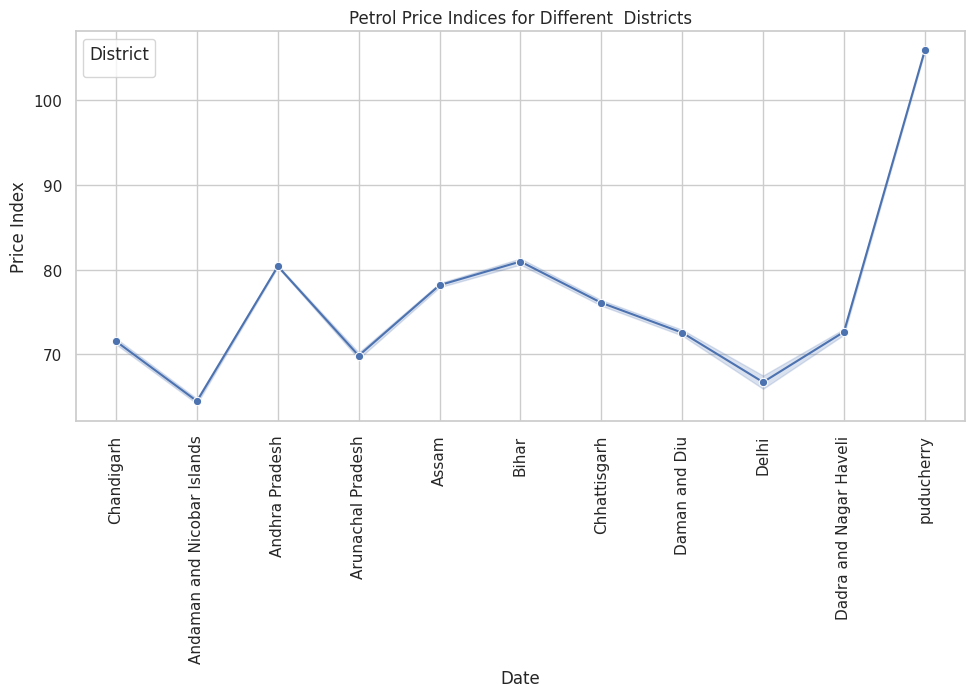

In [ ]:
#Calculate petrol price indices for different districts
# Group by district and calculate the mean of petrol rates
df.groupby(['district'])['rate'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=df.district,y=df.rate,data=df,marker='o')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('Petrol Price Indices for Different  Districts')
plt.grid(True)
plt.legend(title='District', loc='upper left')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In the above The line plot illustrates the petrol price indices over time for different districts, enabling insights into relative price trends and potential variations among districts.

#10.Data Visualization:
Create charts, graphs, and maps to visually
represent the variations and trends in petrol rates, making it
easier to understand and communicate the insights.

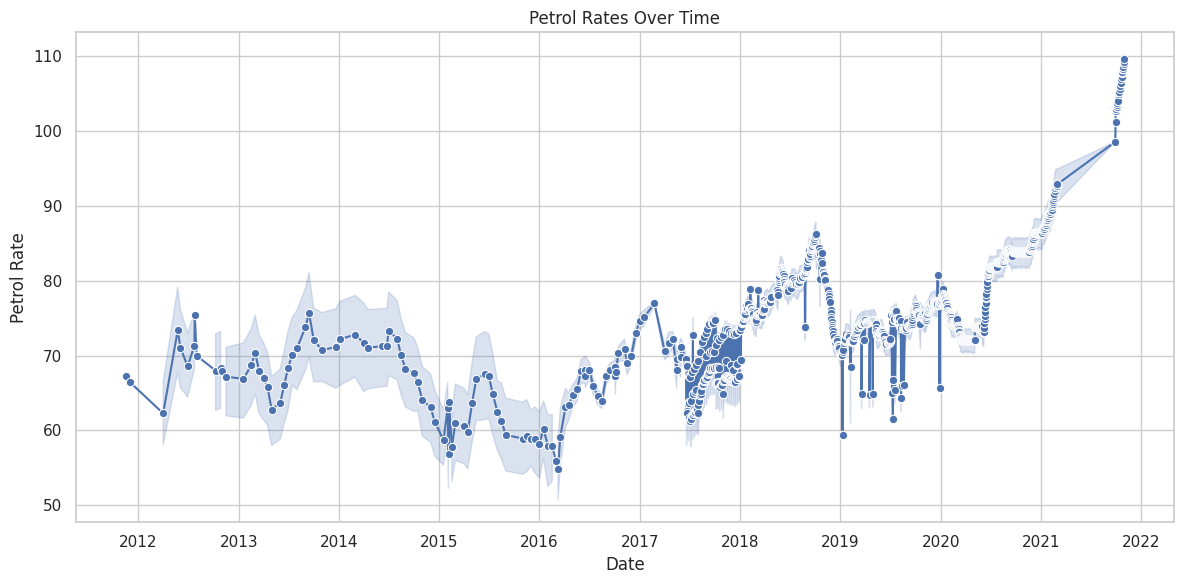

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Create a line plot for petrol rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['rate'], marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Petrol Rate')
plt.title('Petrol Rates Over Time')
plt.tight_layout()
plt.show()

In the above The line plot depicts the trajectory of petrol rates over time, providing insights into historical price fluctuations and potential trends.

In [ ]:
df.district.unique()

array(['Chandigarh', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
       'Daman and Diu', 'Delhi', 'Dadra and Nagar Haveli', 'puducherry'],
      dtype=object)

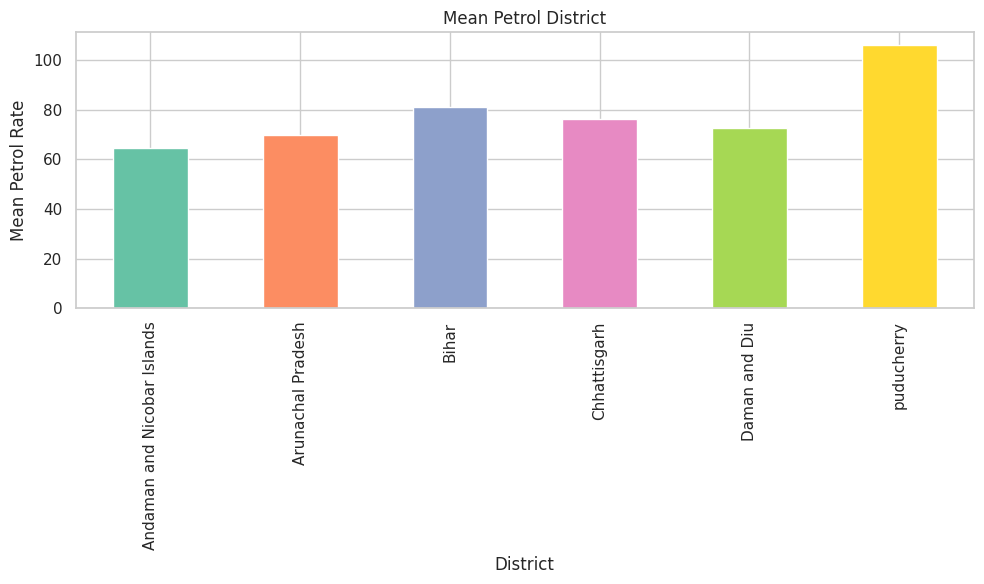

In [ ]:
district_rate = df.groupby(['district'])['rate'].mean()

# Specify a Seaborn color palette
color_palette = sns.color_palette("Set2", n_colors=len(district_rate))

#bar plot for mean petrol rates of  every 5th district.
plt.figure(figsize=(10, 6))
n = 2
districts = district_rate.index[::n]
district_rate.loc[districts].plot(kind='bar',color=color_palette)
plt.xlabel('District')
plt.ylabel('Mean Petrol Rate')
plt.title('Mean Petrol District')
plt.grid(True)
plt.tight_layout()
plt.show()

In the above barplot displays the mean petrol rates for every 2nd district, utilizing distinct colors to represent districts, revealing insights into relative pricing variations among select districts.

In [ ]:
df.district.unique()

array(['Chandigarh', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
       'Daman and Diu', 'Delhi', 'Dadra and Nagar Haveli', 'puducherry'],
      dtype=object)

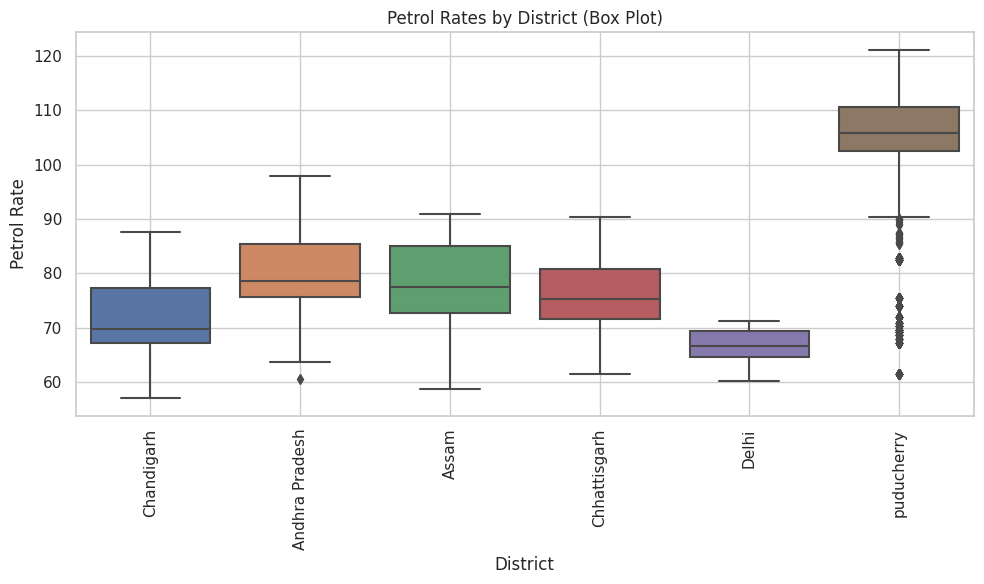

In [ ]:
#Boxplot for every 2th district
n = 2 #2th district name
selected_districts = df['district'].unique()[::n]

df_selected = df[df['district'].isin(selected_districts)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='district', y='rate', data=df_selected)
plt.xlabel('District')
plt.ylabel('Petrol Rate')
plt.title('Petrol Rates by District (Box Plot)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()

In the above Box plot showcases the distribution of petrol rates for every 2nd district, highlighting potential central tendencies, spread, and outliers within the selected districts.

<ipython-input-112-84e27e1762ca>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)


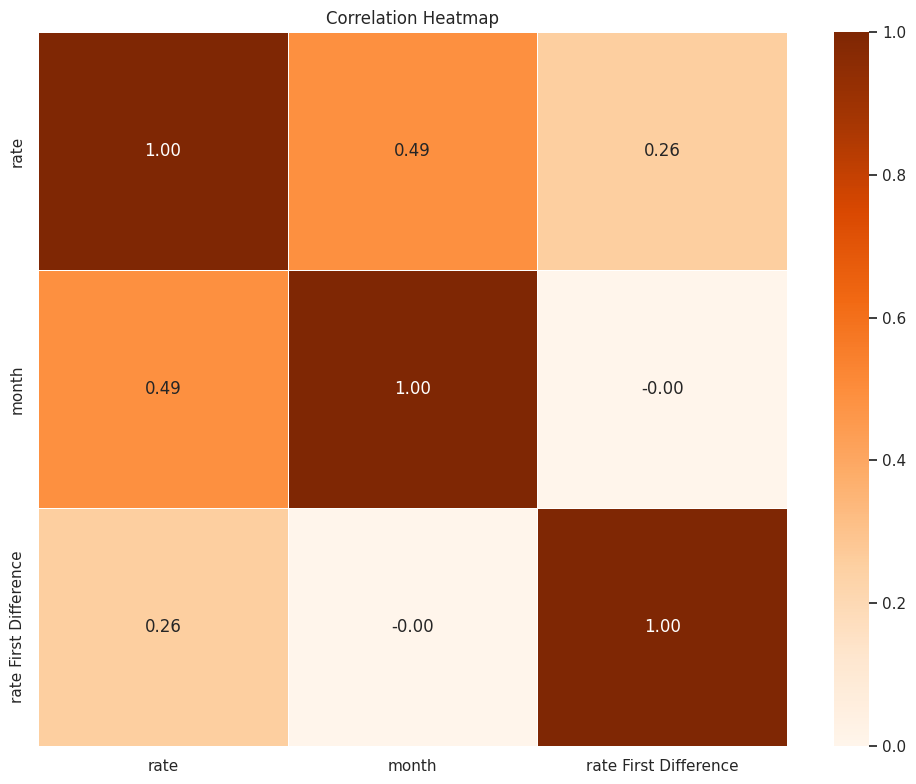

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Heatmap to Visualize Correlations

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



In the above heatmap visually represents correlations between variables in the dataset